# Case Study : Analysis on superstore dataset

## Steps for data analysis
### 1.Gathering data
### 2.Understanding the data
### 3.Cleaning the dataset
### 4.Statistical Analysis
### 5.Visualization

### We are using sample superstore dataset that is available on kaggle.
link :https://www.kaggle.com/datasets/bravehart101/sample-supermarket-dataset

#### Importing the dataset and understanding it

In [199]:
# importing necessary libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [200]:
#importing dataset using pandas read_csv()
df=pd.read_csv("C:\\Users\\NIDHI\\Downloads\\SampleSuperstore.csv~\\SampleSuperstore.csv")

In [201]:
#First 5 entries of dataset
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [202]:
#shape of dataset
df.shape
#9994 rows and 13 columns

(9994, 13)

In [203]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Lets understand each feature in dataset


In [204]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [206]:
df.isnull().sum() #no null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='Count'>

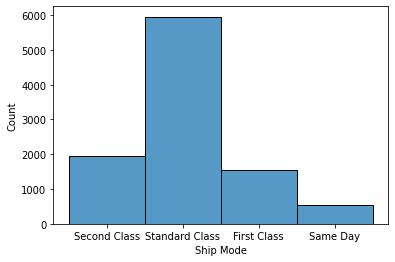

In [207]:
sns.histplot(x='Ship Mode',data=df)


##### As we can see standard class is the most used shipping mode 

In [208]:
data_ship=pd.DataFrame(df.groupby('Ship Mode')['Sales','Profit'].sum())
data_ship.reset_index(inplace=True)

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\1100815875.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_ship=pd.DataFrame(df.groupby('Ship Mode')['Sales','Profit'].sum())


<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

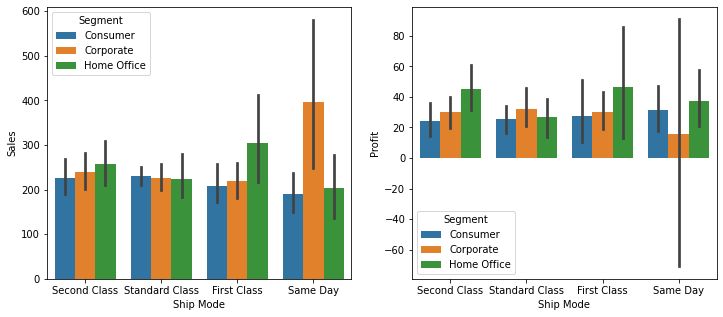

In [209]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(ax=axes[0],x='Ship Mode',y='Sales',data=df,hue='Segment')
sns.barplot(ax=axes[1],x='Ship Mode',y='Profit',data=df,hue='Segment')

In [210]:
data_ship1=data_ship.sort_values(by='Profit',ascending=False)

<AxesSubplot:xlabel='Ship Mode', ylabel='Profit'>

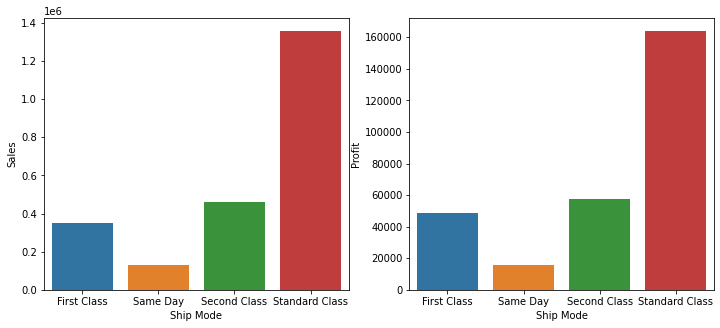

In [211]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(ax=axes[0], x='Ship Mode', y='Sales',data=data_ship)
sns.barplot(ax=axes[1], x='Ship Mode', y='Profit',data=data_ship)

<AxesSubplot:xlabel='Segment', ylabel='Count'>

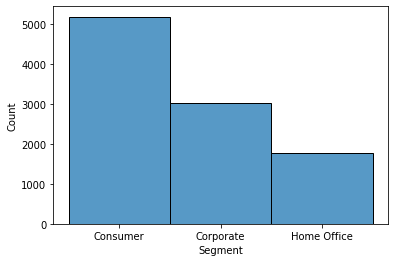

In [212]:
sns.histplot(x='Segment',data=df)

#### Consumer segment is the highest one

<AxesSubplot:xlabel='Segment', ylabel='Count'>

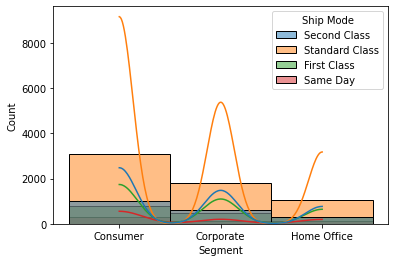

In [213]:
sns.histplot(x='Segment',data=df,hue='Ship Mode',kde=True)

<AxesSubplot:xlabel='Category', ylabel='Count'>

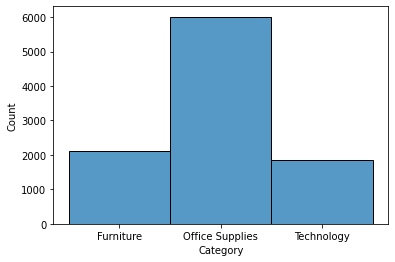

In [214]:
sns.histplot(x='Category',data=df)

<AxesSubplot:xlabel='Category', ylabel='Sales'>

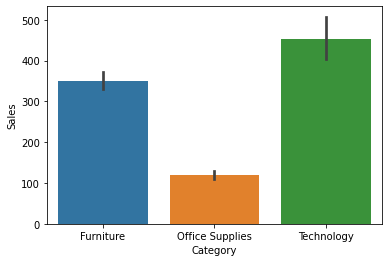

In [215]:
sns.barplot(x='Category',y='Sales',data=df)

#### Technology records highest sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

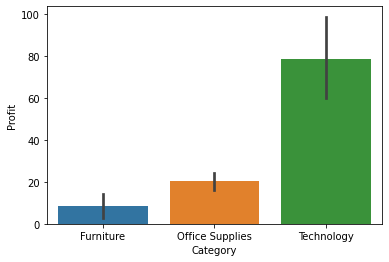

In [216]:
sns.barplot(x='Category',y='Profit',data=df)

#### Profit is highest in technology and lowest in furniture category

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

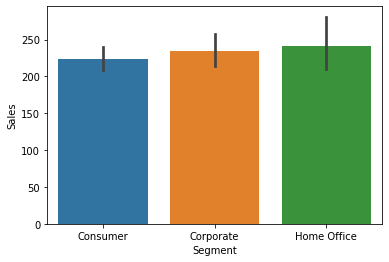

In [217]:
sns.barplot(x='Segment',y='Sales',data=df)

# Home office segment records highest sales

<AxesSubplot:xlabel='Category', ylabel='Profit'>

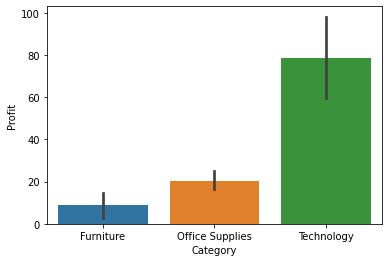

In [218]:
sns.barplot(x='Category',y='Profit',data=df)

### Technology category records highest sales

In [219]:
df_city=pd.DataFrame(df.groupby('City')['Sales'].sum())
df_city.reset_index(inplace=True)

In [220]:
df_topCity=pd.DataFrame(df_city.sort_values(by='Sales',ascending=False)[:10])
df_topCity.reset_index(inplace=True)

### Top 10 cities that records highest sales 
New York city records highest sales

<AxesSubplot:xlabel='City', ylabel='Sales'>

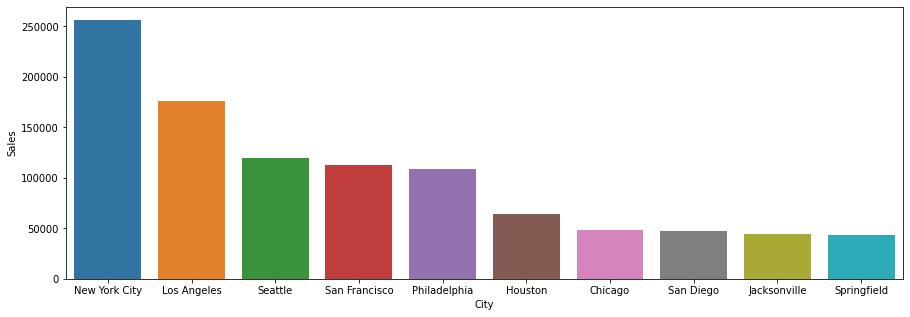

In [221]:
plt.figure(figsize=(15, 5))
sns.barplot(x='City',y='Sales',data=df_topCity)

## Highest selling categories

In [222]:
df_cat=df.groupby('Category')['Sales','Profit'].sum()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\3498630035.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cat=df.groupby('Category')['Sales','Profit'].sum()


In [223]:
df_cat.reset_index(inplace=True)

<AxesSubplot:xlabel='Category', ylabel='Profit'>

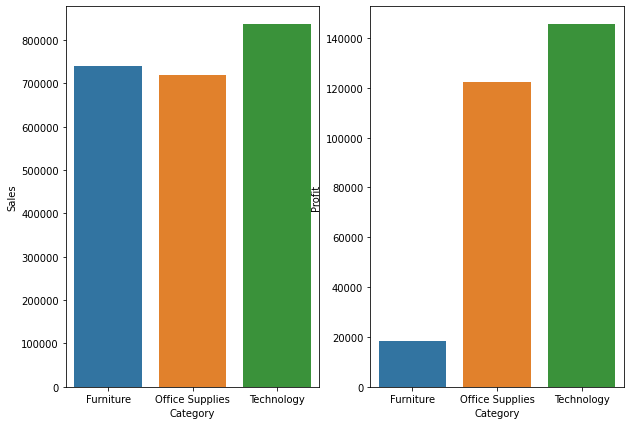

In [224]:
fig, axes = plt.subplots(1, 2,figsize=(10,7))
sns.barplot(ax=axes[0], x='Category', y='Sales',data=df_cat)
sns.barplot(ax=axes[1], x='Category', y='Profit',data=df_cat)

## Top 10 cities with highest profit

In [225]:
df_city_pro=pd.DataFrame(df.groupby('City')['Profit'].sum())
df_city_pro.reset_index(inplace=True)

In [226]:
df_profit_city=pd.DataFrame(df_city_pro.sort_values(by='Profit',ascending=False)[:10])

<AxesSubplot:xlabel='City', ylabel='Profit'>

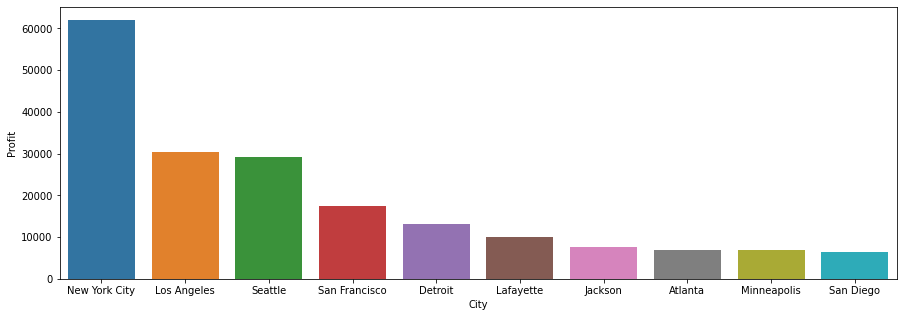

In [227]:
plt.figure(figsize=(15, 5))
sns.barplot(x='City',y='Profit',data=df_profit_city)

## Top 10 Sub-Categories

In [228]:
df_subcat=pd.DataFrame(df.groupby('Sub-Category')['Sales','Profit'].sum())


C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\693023401.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_subcat=pd.DataFrame(df.groupby('Sub-Category')['Sales','Profit'].sum())


In [229]:
df_subcat10=df_subcat.sort_values(by='Sales',ascending=False)
df_subcat_pro10=df_subcat.sort_values(by='Profit',ascending=False)
df_subcat10.reset_index(inplace=True)
df_subcat_pro10.reset_index(inplace=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

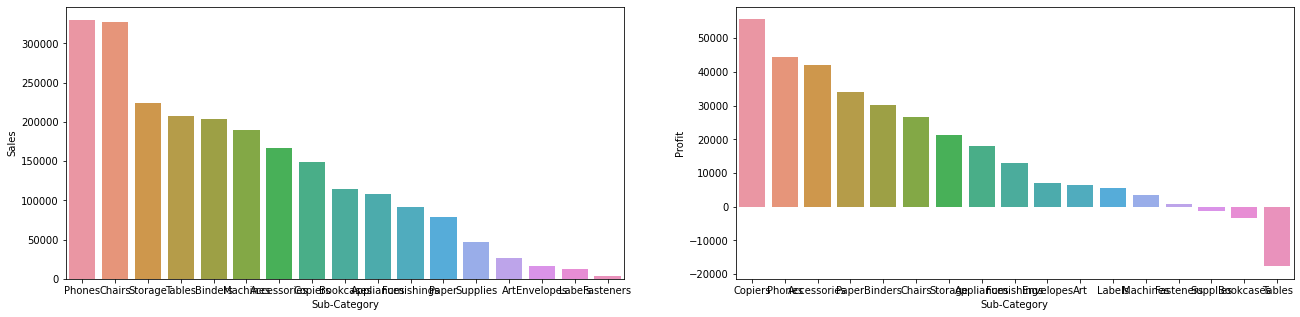

In [230]:
fig, axes = plt.subplots(1, 2,figsize=(22,5))
sns.barplot(ax=axes[0], x='Sub-Category', y='Sales',data=df_subcat10)
sns.barplot(ax=axes[1], x='Sub-Category', y='Profit',data=df_subcat_pro10)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

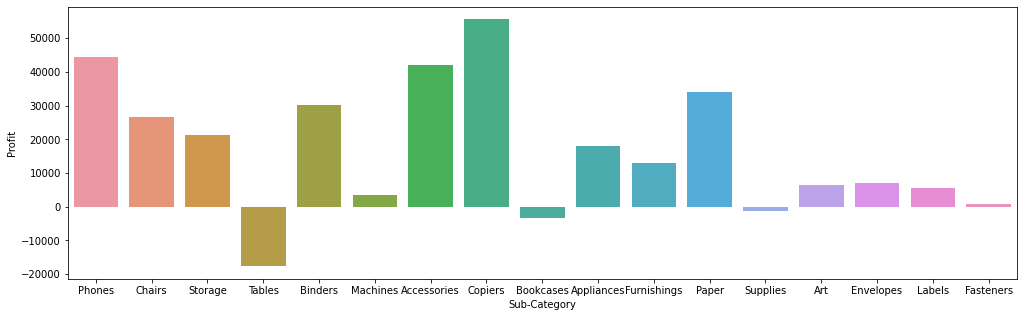

In [231]:
plt.figure(figsize=(17, 5))
sns.barplot( x='Sub-Category', y='Profit',data=df_subcat10)

## Top 10 states with high sales

In [232]:
df_state=pd.DataFrame(df.groupby('State')['Sales'].sum())

In [233]:
df_state10=df_state.sort_values(by='Sales',ascending=False)[:10]
df_state10.reset_index(inplace=True)

<AxesSubplot:xlabel='State', ylabel='Sales'>

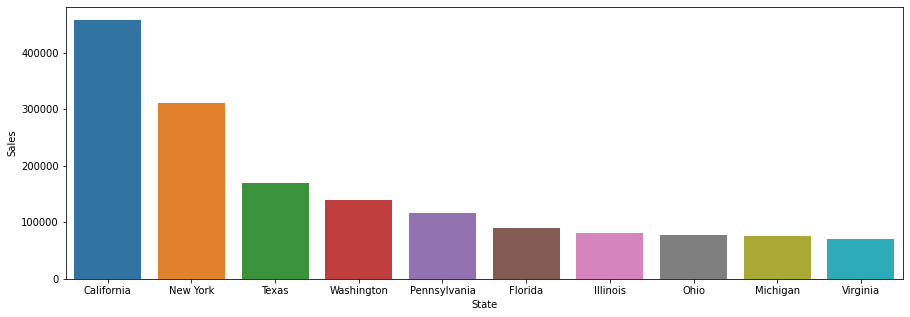

In [234]:
plt.figure(figsize=(15, 5))
sns.barplot(x='State',y='Sales',data=df_state10)

## Most sold category

In [235]:
df_quant=pd.DataFrame(df.groupby('Category')['Quantity'].sum())

In [236]:
df_quant.reset_index(inplace=True)
df_quant

,Category,Quantity
0,Furniture,8020
1,Office Supplies,22861
2,Technology,6939


<AxesSubplot:xlabel='Category', ylabel='Quantity'>

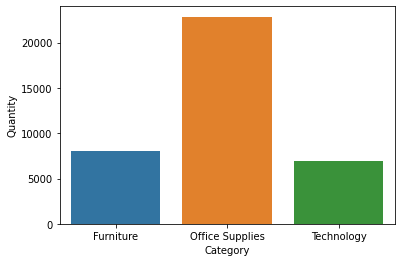

In [237]:
sns.barplot(x='Category',y='Quantity',data=df_quant)

### Most sold sub-category

In [238]:
df_quant_sub=pd.DataFrame(df.groupby('Sub-Category')['Quantity'].sum())

In [239]:
df_quant_sub.reset_index(inplace=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Quantity'>

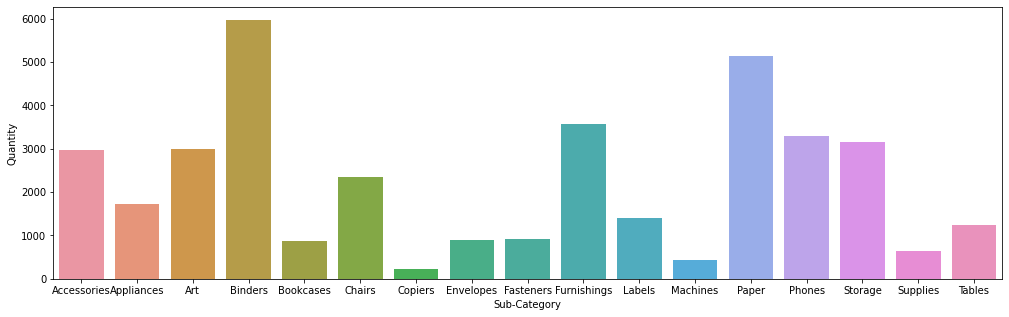

In [240]:
plt.figure(figsize=(17,5))
sns.barplot(x='Sub-Category',y='Quantity',data=df_quant_sub)

In [241]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [242]:
df['Sales'].mean()

230.14890150345792

In [243]:
df_regional=pd.DataFrame(df.groupby('Region')['Sales'].sum())

In [244]:
df_regional.reset_index(inplace=True)

<AxesSubplot:xlabel='Region', ylabel='Sales'>

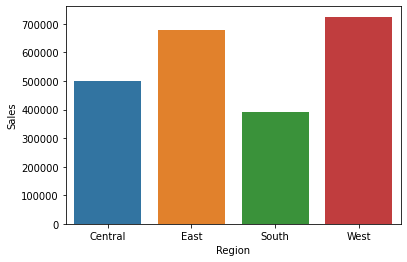

In [245]:
sns.barplot(x='Region',y='Sales',data=df_regional)

## West Region records highest sales

In [157]:
df_regional_pro=pd.DataFrame(df.groupby('Region')['Profit'].sum())

In [158]:
df_regional_pro.reset_index(inplace=True)

<AxesSubplot:xlabel='Region', ylabel='Profit'>

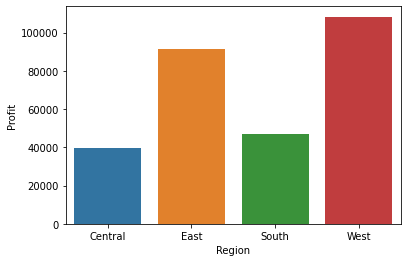

In [159]:
sns.barplot(x='Region',y='Profit',data=df_regional_pro)

In [160]:
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [161]:
df_city_low=pd.DataFrame(df_city.sort_values(by='Sales',ascending=True)[:10])

In [162]:

df_city_low.reset_index(inplace=True)

<AxesSubplot:xlabel='City', ylabel='Sales'>

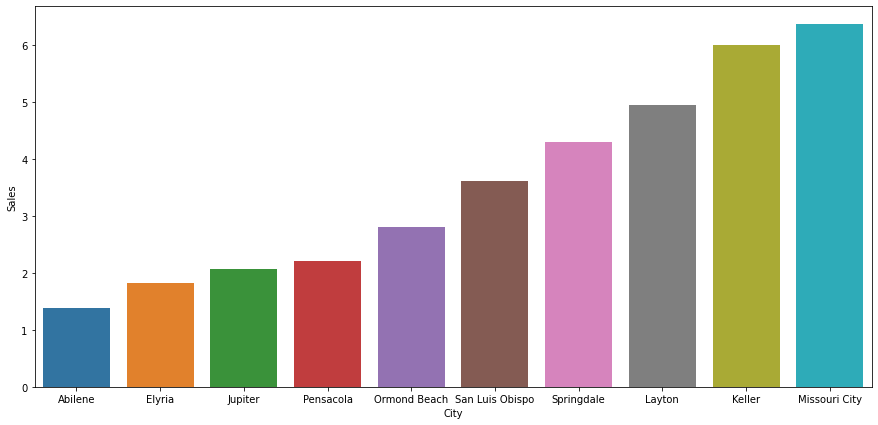

In [163]:
(plt.figure(figsize=(15,7)))
sns.barplot(x='City',y='Sales',data=df_city_low)

In [164]:
df_loss=df[df['Profit']<0]

In [165]:
df_loss

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
23,Second Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Chairs,71.3720,2,0.30,-1.0196
27,Standard Class,Consumer,United States,Philadelphia,Pennsylvania,19140,East,Furniture,Bookcases,3083.4300,7,0.50,-1665.0522
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9920,Standard Class,Corporate,United States,Bryan,Texas,77803,Central,Office Supplies,Binders,22.3860,7,0.80,-35.8176
9921,Standard Class,Home Office,United States,Akron,Ohio,44312,East,Office Supplies,Binders,5.7420,3,0.70,-4.5936
9931,Standard Class,Consumer,United States,San Bernardino,California,92404,West,Furniture,Bookcases,683.3320,4,0.15,-40.1960
9937,Second Class,Corporate,United States,Los Angeles,California,90049,West,Furniture,Tables,71.0880,2,0.20,-1.7772


In [166]:
import numpy as np

df_city_loss=df_loss.groupby('City')['Profit','Discount'].sum()

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\457520859.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_city_loss=df_loss.groupby('City')['Profit','Discount'].sum()


In [167]:
df_loss_10=pd.DataFrame(df_city_loss.sort_values(by='Profit',ascending=True)[:10])

In [168]:
df_loss_10.reset_index(inplace=True)

<AxesSubplot:xlabel='City', ylabel='Profit'>

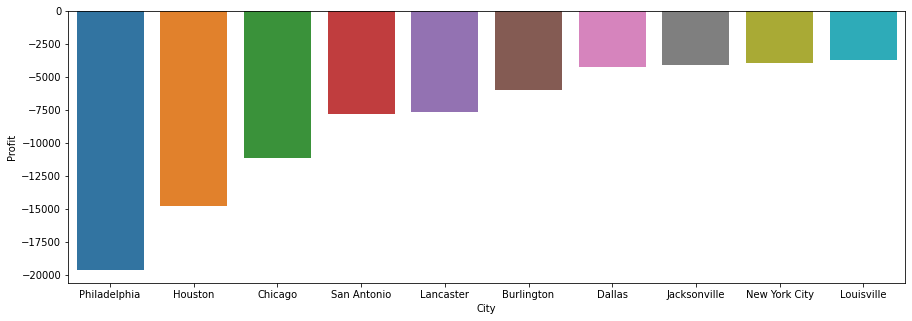

In [169]:
plt.figure(figsize=(15,5))

sns.barplot(x='City',y='Profit',data=df_loss_10)

In [170]:
df_cat_loss=df_loss.groupby('Sub-Category')['Profit','Discount'].sum()


C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\960683169.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_cat_loss=df_loss.groupby('Sub-Category')['Profit','Discount'].sum()


In [171]:
df_subcat_loss=pd.DataFrame(df_cat_loss.sort_values(by='Profit',ascending=True))

In [172]:
df_subcat_loss.reset_index(inplace=True)

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

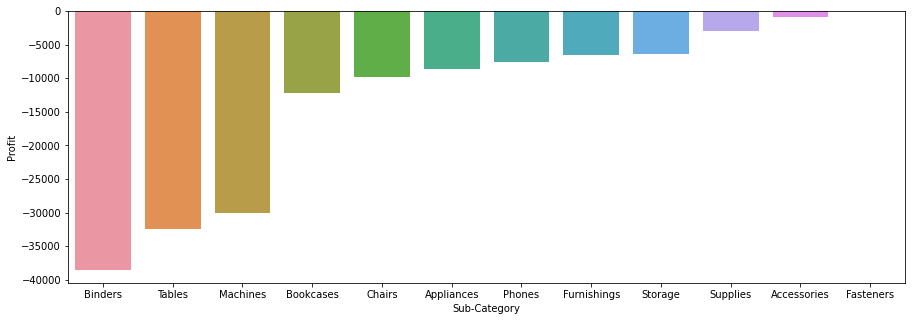

In [173]:
plt.figure(figsize=(15,5))
sns.barplot(x='Sub-Category',y='Profit',data=df_subcat_loss)

In [174]:
data1=pd.DataFrame(df.groupby('Segment')['Profit','Sales','Discount'].sum())
data1.reset_index(inplace=True)

C:\Users\NIDHI\AppData\Local\Temp\ipykernel_504\3066783888.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data1=pd.DataFrame(df.groupby('Segment')['Profit','Sales','Discount'].sum())


<AxesSubplot:xlabel='Segment', ylabel='Profit'>

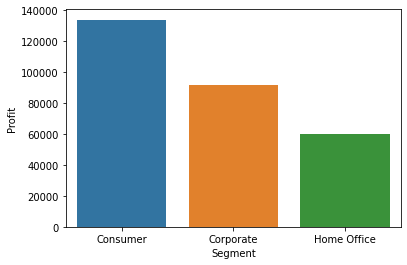

In [175]:
sns.barplot(x='Segment',y='Profit',data=data1)

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

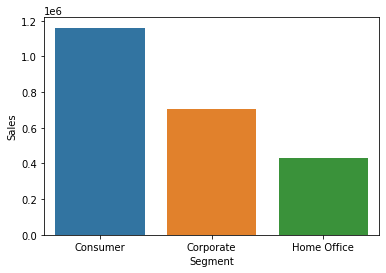

In [176]:

sns.barplot(x='Segment',y='Sales',data=data1)

### Insights /Conclusions

#### Analysis based on customer segments[consumer,corporate,home office]
With respect to sales:

1.Consumer

2.Corporate

3.Home Office

With respect to Profit:

1.Consumer 

2.Corporate

3.Home Office

Standard class is most common type of ship mode in all segments



#### Analysis as per category

With respect to sales:

1.Technology

2.Office supplies

3.Furniture

With respect to profit:

1.Technology

2.Office supplies

3.Furniture


In [ ]:
df_category1=df.groupby('Category')['Sales','Profit'].sum()
df_category1.reset_index(inplace=True)

In [ ]:
df_category1.sort_values(by='Profit',ascending=False)

In [ ]:
fig, axes = plt.subplots(1, 2,figsize=(12,5))
sns.barplot(ax=axes[0], x='Category', y='Sales',data=df_category1)
sns.barplot(ax=axes[1], x='Category', y='Profit',data=df_category1)

<AxesSubplot:xlabel='Sub-Category', ylabel='Discount'>

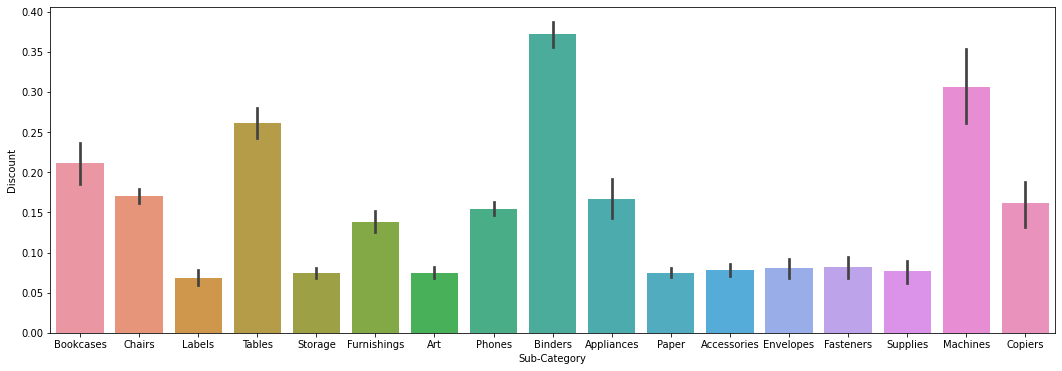

In [250]:
plt.figure(figsize=(18,6))
sns.barplot(x='Sub-Category',y='Discount',data=df)

In [251]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


<AxesSubplot:>

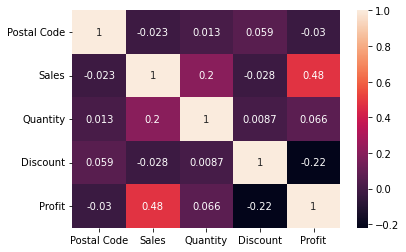

In [252]:
sns.heatmap(df.corr(),annot=True)